# CM4044 Project 2

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
data = pd.read_csv('enthalpy_data.csv', sep=',')

data = data[['Smiles', 'Enthalpy(kcal)']]

# calculate the molecules descriptors and append them to the data object
data['Mol'] = data['Smiles'].apply(Chem.MolFromSmiles)

descriptor_names = [desc_name for desc_name, _ in Descriptors._descList]
# print(descriptor_names)
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
def calc_all_descriptors(mol):
    if mol is None:
        return [None] * len(descriptor_names)
    return list(calculator.CalcDescriptors(mol))
data['Descriptors'] = data['Mol'].apply(calc_all_descriptors)
data.rename(columns={'Enthalpy(kcal)': 'Enthalpy'}, inplace=True)

data = data.drop(columns=['Mol'])

data.head(5)

/var/folders/p3/q3l5ztdd55l33qdyvfddjhj00000gn/T/ipykernel_9953/3009124427.py:1: DtypeWarning: Columns (121,122,301,302,303,304,305,307,308,309,422,423,424,425,426,428,429,430,488,489,490,491,492,494,495,496,522,523,524,525,526,528,529,530,556,557,558,559,560,562,563,564,590,591,592,593,594,596,597,598,624,625,626,627,628,630,631,632,658,659,660,661,662,664,665,666,1638,1639,1640,1641,1642,1644,1645,1646) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('enthalpy_data.csv', sep=',')


,Smiles,Enthalpy,Descriptors
0,CCCCCCCCCCCCCCCCCC,-99.091888,"[2.2939033705287217, 2.2939033705287217, 1.373..."
1,CCCCCCCCCCCCCCCC,-89.480000,"[2.2902201417224934, 2.2902201417224934, 1.372..."
2,CCCCC(C)(C)CC(C)(C)CCCC,-87.619600,"[2.440829081632653, 2.440829081632653, 0.53497..."
3,CCCC(C)(CC)CC(C)(CC)CCC,-82.958983,"[2.486180555555556, 2.486180555555556, 0.57805..."
4,CCCCCCCCCCCCCCC,-84.390000,"[2.2879979195002713, 2.2879979195002713, 1.372..."


In [9]:
# convert into data in numpy array

X = np.array(list(data['Descriptors']))
y = data['Enthalpy'].to_numpy()

st = StandardScaler()
X = st.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Linear Regression

Mean R-Squared: 0.992
Mean MAE: 1.257

Linear Regression R-Squared: 0.996
Linear Regression MAE: 1.027


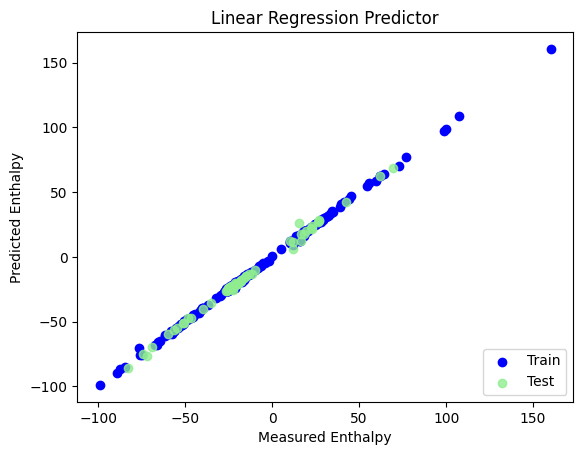

In [ ]:
from sklearn.model_selection import cross_validate, KFold
np.random.seed(0)

lr = LinearRegression()

kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Cross validation
cv_results = cross_validate(
    lr,
    X_train,
    y_train,
    cv=kf,
    scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error'},
    return_train_score=True
)

# print("Cross-validation R-Squared (test):", cv_results['test_r2'])
# print("Cross-validation MAE (test):", -cv_results['test_mae'])
print(f"Mean R-Squared: {np.mean(cv_results['test_r2']):.3f}")
print(f"Mean MAE: {-np.mean(cv_results['test_mae']):.3f}\n")

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

#model evaluation
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print(f"Linear Regression R-Squared: {(r2_lr):.3f}")
print(f"Linear Regression MAE: {(mae_lr):.3f}")

plt.scatter(y_train, lr.predict(X_train), label = 'Train', c='blue')
plt.title('Linear Regression Predictor')
plt.xlabel('Measured Enthalpy')
plt.ylabel('Predicted Enthalpy')
plt.scatter(y_test, lr.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
#plt.savefig('Linear Regression Predictor.png', dpi=300)
plt.show()

### SVR

Mean R-Squared: 0.997
Mean MAE: 1.118

SVR R-Squared: 0.9965
SVR MAE: 1.1465


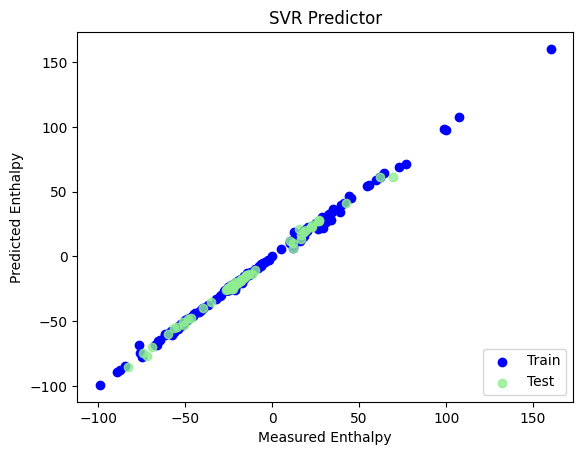

In [ ]:
from sklearn.svm import SVR

np.random.seed(0)
svr = SVR(kernel='linear')

# Cross validation
cv_results = cross_validate(
    svr,
    X_train,
    y_train,
    cv=kf,
    scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error'},
    return_train_score=True
)

# print("Cross-validation R-Squared (test):", cv_results['test_r2'])
# print("Cross-validation MAE (test):", -cv_results['test_mae'])
print(f"Mean R-Squared: {np.mean(cv_results['test_r2']):.3f}")
print(f"Mean MAE: {-np.mean(cv_results['test_mae']):.3f}\n")

svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

#model evaluation
r2_svr = r2_score(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"SVR R-Squared: {(r2_svr):.4f}")
print(f"SVR MAE: {(mae_svr):.4f}")

plt.scatter(y_train, svr.predict(X_train), label = 'Train', c='blue')
plt.title('SVR Predictor')
plt.xlabel('Measured Enthalpy')
plt.ylabel('Predicted Enthalpy')
plt.scatter(y_test, svr.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
#plt.savefig('SVR Predictor.png', dpi=300)
plt.show()

Mean R-Squared: 0.975
Mean MAE: 2.484

XGB R-Squared: 0.9902
XGB MAE: 1.4612


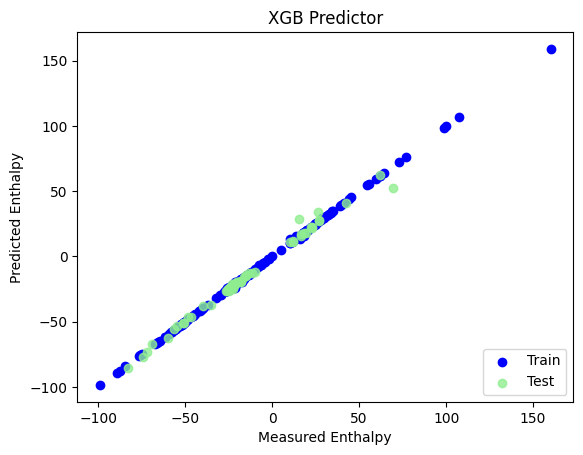

In [36]:
import xgboost as xgb

np.random.seed(0)
xg = xgb.XGBRegressor(random_state=0, n_estimators=200, learning_rate=0.05)

# Cross validation
cv_results = cross_validate(
    xg,
    X_train,
    y_train,
    cv=kf,
    scoring={'r2': 'r2', 'mae': 'neg_mean_absolute_error'},
    return_train_score=True
)

# print("Cross-validation R-Squared (test):", cv_results['test_r2'])
# print("Cross-validation MAE (test):", -cv_results['test_mae'])
print(f"Mean R-Squared: {np.mean(cv_results['test_r2']):.3f}")
print(f"Mean MAE: {-np.mean(cv_results['test_mae']):.3f}\n")

xg.fit(X_train, y_train)
y_pred_xgb = xg.predict(X_test)

#model evaluation
r2_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"XGB R-Squared: {(r2_xgb):.4f}")
print(f"XGB MAE: {(mae_xgb):.4f}")

plt.scatter(y_train, xg.predict(X_train), label = 'Train', c='blue')
plt.title('XGB Predictor')
plt.xlabel('Measured Enthalpy')
plt.ylabel('Predicted Enthalpy')
plt.scatter(y_test, xg.predict(X_test),c='lightgreen', label='Test', alpha = 0.8)
plt.legend(loc=4)
#plt.savefig('XGB Predictor.png', dpi=300)
plt.show()